# Bag of Words

In [1]:
corpus = [
     'Esse é o primeiro documento.',
     'Esse é o segundo.',
     'Seria esse o primeiro?',
]

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a Vectorizer Object
vectorizer = CountVectorizer()
vectorizer.fit(corpus)

# Printing the identified Unique words along with their indices
print("Vocabulary: ", vectorizer.vocabulary_)

# Encode the Document
vector = vectorizer.transform(corpus)
 
# Summarizing the Encoded Texts
print("Encoded Document is:")
print(vector.toarray())

'Esse é o primeiro documento.'
'Esse é o segundo.'
'Seria esse o primeiro?'

Vocabulary:  {'esse': 1, 'primeiro': 2, 'documento': 0, 'segundo': 3, 'seria': 4}
Encoded Document is:
[[1 1 1 0 0]
 [0 1 0 1 0]
 [0 1 1 0 1]]


# Detector de Fake News com BOW

In [115]:
!pip install openpyxl

In [31]:
import pandas as pd

dataframe = pd.read_excel('FakeRecogna_no_removal_words.xlsx')
dataframe.head()

,Titulo,Subtitulo,Noticia,Categoria,Data,Autor,URL,Classe
0,\n\nArthur Lira fraudou a votação sobre voto i...,Boato – Está comprovado que a votação sobre o ...,bomba lira fraudar o votação brasília explodir...,política,17/08/2021,\nEdgard Matsuki,https://www.boatos.org/politica/arthur-lira-fr...,0
1,WhatsApp agora permite silenciar conversas e g...,"Opção vinha sendo testada no aplicativo, e foi...",o whatsapp liberar quinta-feira atualização ap...,política,23/10/2020 10h02,Por G1,https://g1.globo.com/economia/tecnologia/notic...,1
2,"Com Lula, Bolsonaro e Ciro, Fortaleza vira mic...",NaN,debater propor o cidade o campanha prefeitura ...,política,27/10/2020 04h00,Carlos Madeiro,https://noticias.uol.com.br/eleicoes/2020/10/2...,1
3,Alesp aprova projeto que multa em até R$ 100 m...,NaN,o alesp assembleia legislativo paulo aprovar h...,saúde,10/02/2021 23h56,10/02/2021 23h56,https://noticias.uol.com.br/saude/ultimas-noti...,1
4,\n Não é verdade que Fauci sabia há 15 anos q...,Publicações compartilhadas dezenas de vezes de...,“ fauci aprovar o hidroxicloroquina haver ano ...,saúde,11/08/2020 às 20:45,AFP Austrália,https://checamos.afp.com//nao-e-verdade-que-fa...,0


## Word Cloud de Fake News

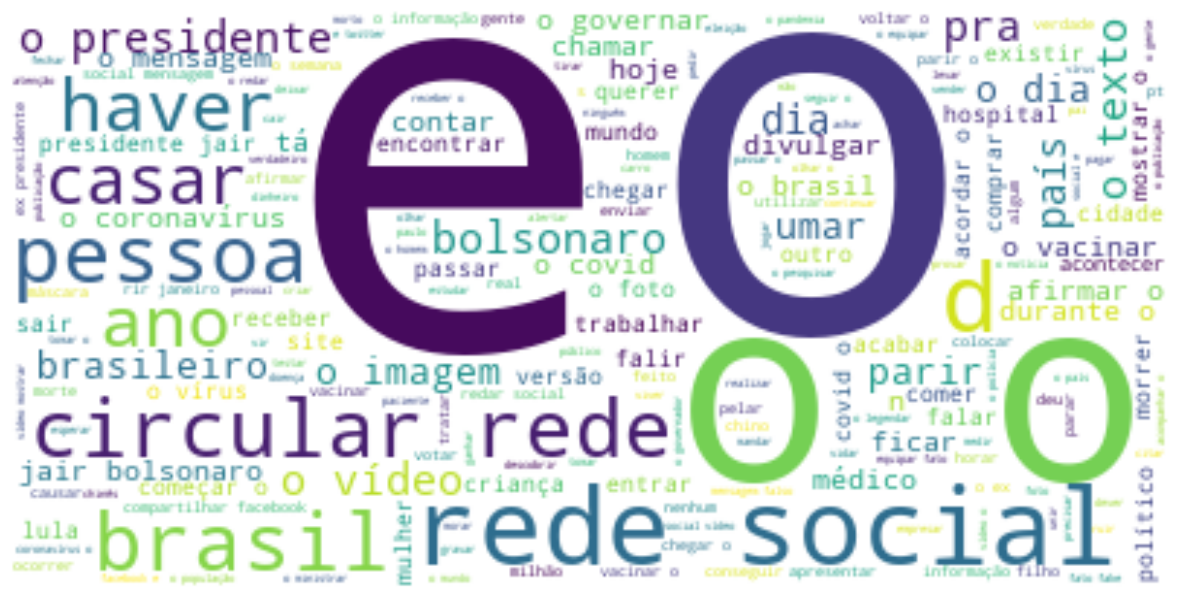

In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#notícias falsas
dataframe_fake = dataframe[dataframe["Classe"] == 0]
text = " ".join(i for i in dataframe_fake['Noticia'])
wordcloud = WordCloud(background_color="white").generate(text)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [118]:
text[:1000]

'bomba lira fraudar o votação brasília explodir votar impresso auditável perder roubar umar haver fraudar o votação o câmara deputar imaginar o eleição presidencial bomba bomba bomba bomba lira fraudar o votação brasília explodir “ fauci aprovar o hidroxicloroquina haver ano curar coronavírus ” o título publicação compartilhar facebook explicar o atual conselheiro o pandemia covid-19 unir anthony fauci supostamente conhecer o eficácia cloroquina e hidroxicloroquina tratamento coronavírus e ocultar o texto justificar “ o virology journal o publicação oficial instituto nacional saudar dr fauci publicar o artigo sucesso agostar o cabeçalho prepare-se “ o cloroquina potente inibidor infecção e disseminação coronavírus sars ” “ significar claro o dr fauci foto haver ano o cloroquina e o hidroxicloroquina derivar suave hcq tratar casar atual coronavírus ‘ terapêutico ’ prevenir caso futuro ‘ profiláticos ’ o hcq funcionar curar e vacinar palavra drogar maravilhoso o coronavírus ” continuar o

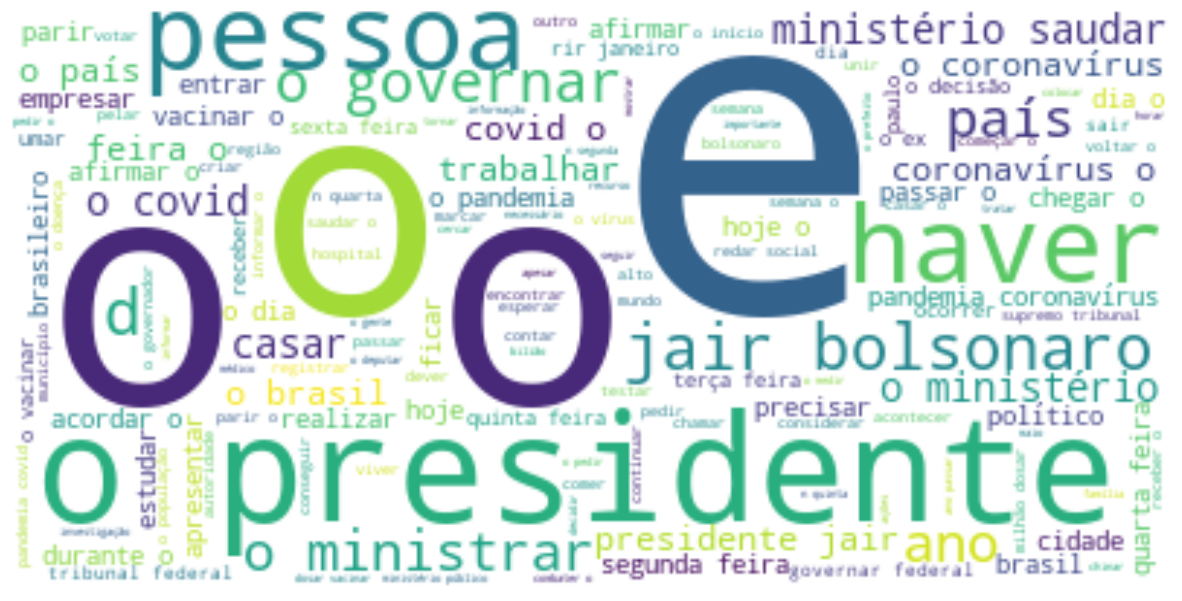

In [8]:
#notícias reais
dataframe_fake = dataframe[dataframe["Classe"] == 1]
text = " ".join(i for i in dataframe_fake['Noticia'])
wordcloud = WordCloud(background_color="white").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Classificação

In [32]:
#apenas notícias e rótulos
df_news_labels = dataframe[['Noticia', 'Classe']]

#remover linhas nulas
df_news_labels = df_news_labels.dropna()

#df_news_labels[df_news_labels.isnull().any(axis=1)]

,Noticia,Classe


In [10]:
news = df_news_labels.Noticia
labels = df_news_labels.Classe #0 = fake news; 1 = real news

0    5951
1    5951
Name: Classe, dtype: int64


<AxesSubplot: >

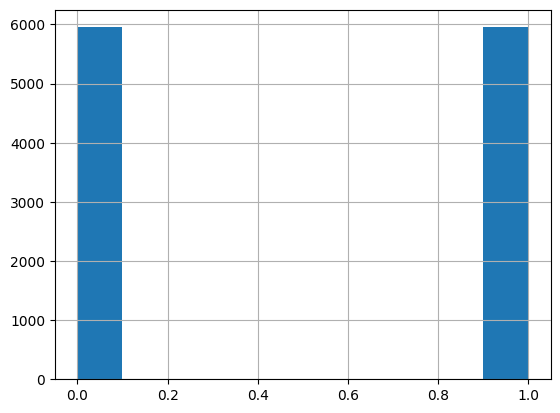

In [11]:
print(labels.value_counts())
labels.hist() #verificar balanceamento

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(news, labels, test_size = 0.1)
print(X_test)

10314    dilson ligar tá brasília o negócio tá ferver b...
2306     o quinzena janeiro imagem e texto espalhar o r...
11041    o demissão marcelo álvaro antônio ministério t...
3412     funcionário hospital pulido valente lisboa con...
5321     o gente bater o tecla o e-farsas hoje dia exis...
                               ...                        
9374     o gravação mulher mostrar motorista caminhões-...
11256    “ chino buscar aprovação tribunal matar 20.000...
9487     pessoa lúpus contrair o covid-19 insinuar publ...
10960    o pessoa morrer covid-19 haver hospitalizar e ...
434      cientista governar unir esforçar fabricar linh...
Name: Noticia, Length: 1191, dtype: object


In [22]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

bow_model = CountVectorizer()
X_train = bow_model.fit_transform(X_train)
X_test = bow_model.transform(X_test)

CountVectorizer()


In [26]:
X_train.shape

(10711, 32327)

In [125]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [126]:
print("Acurácia do treino:", model.score(X_train, y_train))
print("Acurácia do teste:", model.score(X_test, y_test))

Acurácia do treino: 0.9500513490803847
Acurácia do teste: 0.9160369437447523


# Após 100 tentativas

In [127]:
from tqdm import tqdm

sum_train = 0
sum_test = 0
for i in tqdm(range(200)):
    X_train, X_test, y_train, y_test = train_test_split(news, labels, test_size = 0.1)
    bow_model = CountVectorizer()
    X_train = bow_model.fit_transform(X_train)
    X_test = bow_model.transform(X_test)
    model = MultinomialNB()
    model.fit(X_train, y_train)
    
    sum_train += model.score(X_train, y_train)
    sum_test += model.score(X_test, y_test)

print(sum_train/200, sum_test/200)

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [02:02<00:00,  1.64it/s]

0.9498650919615347 0.9209613769941251


# Referências

* https://repositorio.unesp.br/handle/11449/234317
* https://github.com/Gabriel-Lino-Garcia/FakeRecogna
* https://thecleverprogrammer.com/2021/11/11/word-cloud-from-a-pandas-dataframe-in-python/
* https://www.udemy.com/course/natural-language-processing-in-python/
* https://medium.com/co-learning-lounge/nlp-word-embedding-tfidf-bert-word2vec-d7f04340af7f
* https://www.geeksforgeeks.org/using-countvectorizer-to-extracting-features-from-text/
* https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
* https://machinelearningmastery.com/gentle-introduction-bag-words-model/